https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/

- cloudword plot of keywords in general
- cloudword plot of keywords in negative and positive reviews
- overtime sentiment
- overtime ratings

# **Sentiment Analysis**

**What is sentiment analysis?** 

In simple words, Sentiment analysis is defined as the process of mining of data, view, review or sentence to predict the emotion of the sentence through natural language processing (NLP), a branch of computer science concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. The sentiment analysis involve classification of text into three phase “Positive”, “Negative” or“Neutral”. It analyzes the data and labels the ‘better’ and ‘worse’ sentiment as positive and negative respectively.

Sentiment Analysis is very helpful in a variety of applications, in this case it is used to understand the real customer feedbacks based on their comments and reviews.

---

In this analysis different approaches were used:
- an approach using the powerful functionalities of the library NLTK (Natural Language ToolKit - https://www.nltk.org/),
- some Machine Learning models (KNN, Naive Bayes, Logistic Regression, SVM, Random Forest, XGBoost) along with pre-trained Deep Learning models (such as HuggingFace's RoBERTa)
- extra: use of built pipelines for making sentiment analysis really quick and easy (this will be really useful for the streamlit sentiment analyzer webapp)

---

This is the analyzed product: 
- Product: https://www.amazon.co.uk/PreSonus-3-5-inch-High-Definition-Active-Monitors/dp/B075QVMBT9/ref=cm_cr_arp_d_product_top?ie=UTF8
- Reviews: https://www.amazon.co.uk/product-reviews/B075QVMBT9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1

## Importing Dependencies

In [319]:
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import json
import time
from wordcloud import WordCloud,STOPWORDS

import nltk
from nltk.stem  import WordNetLemmatizer

In [287]:
'''import pandas as pd
import seaborn as sns
import plotly.express as px
import nltk
# from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# import re,string,unicodedata
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
# from sklearn.model_selection import train_test_split
# from string import punctuation
from nltk import pos_tag
# from nltk.corpus import wordnet
# import re
# import warnings
# warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt'''

"import pandas as pd\nimport seaborn as sns\nimport plotly.express as px\nimport nltk\n# from sklearn.feature_extraction.text import CountVectorizer\nfrom wordcloud import WordCloud,STOPWORDS\n# from nltk.stem import WordNetLemmatizer\n# from nltk.tokenize import word_tokenize\n# import re,string,unicodedata\n# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score\n# from sklearn.model_selection import train_test_split\n# from string import punctuation\nfrom nltk import pos_tag\n# from nltk.corpus import wordnet\n# import re\n# import warnings\n# warnings.filterwarnings('ignore')\nimport matplotlib.pyplot as plt"

In [288]:
pd.set_option("max_colwidth", None)
plt.style.use('ggplot')

## Loading and Cleaning Data

After the data scraping/mining step i ended up with a json file which needs to be converted into a pandas dataframe to simplify the analysis. 

This is the purpose of the **json_2_pandas** function: it takes as input the path where the json file is located, than opens it in 'read' ('r') mode to load the data. After loading the data, I iterate through the object to extract review titles, ratings and contents and adding them to a dictionary.

Then there is another function, the **format_date** function, that uses the datetime module to convert the dates in a easier format for pandas conversion.

In [289]:
def format_date(css_date):
    # only taking the date and joining those elements in a string
    date = css_date.split()[len(css_date.split())-3:]
    date_string = " ".join(date)

    # change format
    date_object = datetime.strptime(date_string, '%d %B %Y')
    formatted_date = date_object.strftime('%Y-%m-%d')
    return formatted_date

In [290]:
def json_2_pandas(json_path):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
    
    reviews = {"Date": [],
               "Title": [],
               "Rating": [],
               "Content": []}

    for page in data:
        if len(page) != 0:          # if there are reviews in that page list
            for review in page:
                # append to the lists in the dictionary the desired elements
                reviews['Date'].append(format_date(review['place and date']))
                reviews['Title'].append(review["title"])
                reviews['Rating'].append(int(review["rating"][:1]))
                reviews['Content'].append(review["body"])
    
    reviews = pd.DataFrame.from_dict(reviews)
    return reviews

Converting the .json file into a pandas DataFrame.

In [291]:
path = 'G:\Il mio Drive\MAGISTRALE\IT Coding\Project\Sentiment-Analysis-on-Amazon-product-reviews\Data\B075QVMBT9_reviews.json'
df = json_2_pandas(json_path = path)

In [292]:
df.to_csv('../Data/reviews.csv')        # to have all the reviews in a .csv file

In [293]:
df.head(10)

,Date,Title,Rating,Content
0,2023-05-28,Good sound,5,Seem decent build quality and good sound. Very happy with purchase.
1,2023-05-27,I didn't realise how bad my audio setup was,5,"Considering I used to have quite a respectable setup many years ago I've feel into a trap of using Bluetooth speakers which leave a lot to be desired. For the price these provide a perfect audio experience. Now I'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. I do feel like I could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. Almost brings a tear to my eye."
2,2023-05-26,Its a beuaty,5,Love its compact shape and sound
3,2023-05-23,Perfect upgrade for PC Audio,5,"If you ruining cheap PC Speakers those will blow your mind. Clean sound, small frame, good value for money."
4,2023-05-21,Wonderful monitors,5,"It's been some years since using any monitors as I use DT770 250's for all my audio work and wow, I'm so pleased I added these to my studio...First the sound...The sound is quite flat which is good as you can accurately EQ your sound. The bass is ""even"", meaning that it's there but it's not exaggerated. The mids are very well balanced (they sound great) and the high end is also fairly well balanced and you can get some nice air and snap when EQing. For those that have the Bayer Dynamic DT770 250's, you'll find your headphones have more ""air"" and snap a bit more in the highs by default, the lower mids probably have a little more punch, but not much. Going back and forth between the 770's and the monitors should be a similar(ish) experience...Build quality and size..Very petit in size, they don't take up much room. The build is absolutely fine for the price. No issues there...You have standard connections by means of speaker wire and phono to 3.5mm (unbalanced). I'd recommend using some TRS to TRS to help eliminate noise from EMF...On the backs you also have access to bass and treble knobs to help tune the sound to your room...On the front you have the power switch and 3.5mm ports for headphones and phone so you can play music from your phone via the correct cable, usually 3.5mm to 3.5mm. Just note that the headphone in isn't powerful enough to power 250ohm headphones...Overall, these monitors are brilliant and well worth the price."
5,2023-05-20,Not loud enough,2,These are probably suited for bedroom use and not anything more. The bass kept cutting out with the highs and mids at times also doing the same. Not great at all - I opted for KrK’s instead!
6,2023-05-18,Faulty,1,Passive speaker won't connect to the main speaker.. Faulty.Very disappointed
7,2023-05-17,Brilliant monitor speakers for DJ'ing,5,"Absolutely love these speakers - perfect for DJ'ing at home and loud enough for a little boogie with the kids. Sound quality is great and I'm glad I did my research ahead of time. Build quality is really good, the volume pot is nice and smooth...These would be great for home music production or for gaming...Well worth the investment."
8,2023-05-14,very good but not as good as the harman kardon soundticks,4,very good but not as good as the harman kardon soundticks..though these are smaller overall
9,2023-05-12,Crackling sound when connected to bluetooth,1,"I’d like to preface this review by saying I tried 2 different sets of these speakers (both the bluetooth version), brand new, and both had the EXACT same issue, so must be a model issue rather than a one-off problem...The first pair I bought had a constant crackling/buzzing noise coming from the passive speaker when connected to bluetooth. The noise disappeared when disconnected from bluetooth, but appeared instantly when connected. It was audible at low volumes which ruined the listening experience so I exchanged for another set...This second set had the EXACT same problem. I tried connecting a different bluetooth device, I tried moving the speakers to different rooms, moving electric

In [294]:
df.shape

(740, 4)

In [295]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date       datetime64[ns]
Title              object
Rating              int64
Content            object
dtype: object

Finally we end up with the pandas DataFrame with 740 reviews, all with date, title, rating and comment.

In [296]:
print('Before correction: ', df.iloc[2,1])
df.iloc[2,1] = "Its a beauty"           # can correct it right away since I saw it
print('After correction: ', df.iloc[2,1])

Before correction:  Its a beuaty
After correction:  Its a beauty


In [297]:
print(df.iloc[16]['Content'])

Bought these speakers to use for my new gaming pc and they haven’t disappointed. Well packaged, look and sound great. I often listen to music such as House so wanted speakers that could also have good bass and they would perform. Brilliant for such a low price.


In [298]:
print(df.iloc[13]['Content'])

Great set of speakers. Good quality sound. Easy connections. Very happy 🙂👍


As we can see from these examples, the first one presents some typing errors which can obviously occur when writing a review. Then we see in the second example that long reviews have been scrapped properly, and in the third example we notice also the presence of emoticons.

But there could be some missing values: let's check.

In [299]:
df[df['Content'].str.len() == 0]

,Date,Title,Rating,Content
12,2023-05-07,Great deal.,5,
53,2023-03-04,Impressive,5,
78,2022-12-29,"Loud, and very clear audio",5,
167,2022-06-24,Awesome! General balanced sound!,5,
291,2021-10-29,great job presonus,5,
296,2021-10-17,Amazing,5,
387,2021-04-12,The best speakers I have ever owned,5,
563,2020-05-07,Amazing Sound. Best I have ever heard,5,
601,2020-02-14,Good quality,3,


We have some missing review contents, but thanks to the title and the rating (as we can see) we can draw some sentiment insights either way! In fact we can already say that these empty reviews are all highly positive, apart from the last one (601) which is pretty neutral, exposing a comment about the good quality of the product but nothing more.

## Exploratory Data Analysis

In [300]:
df.isna().sum()

Date       0
Title      0
Rating     0
Content    0
dtype: int64

In [301]:
df[df['Rating'] == ""], df[df['Title'] == ""], df[df['Date'] == ""]

(Empty DataFrame
 Columns: [Date, Title, Rating, Content]
 Index: [],
 Empty DataFrame
 Columns: [Date, Title, Rating, Content]
 Index: [],
 Empty DataFrame
 Columns: [Date, Title, Rating, Content]
 Index: [])

Looks like we have 0 missing & empty values for the columns.

In [302]:
for col in ['Title', 'Rating', 'Content']:
    print(f'---------{col.upper()}---------')
    print(df[col].describe())
    print("\n")

---------TITLE---------
count            740
unique           666
top       Five Stars
freq               9
Name: Title, dtype: object


---------RATING---------
count    740.000000
mean       4.481081
std        1.100335
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64


---------CONTENT---------
count     740
unique    730
top          
freq        9
Name: Content, dtype: object




On a total of 740 reviews, We have 666 unique titles and 730 unique review contents.

Let's see the ratings distribution:

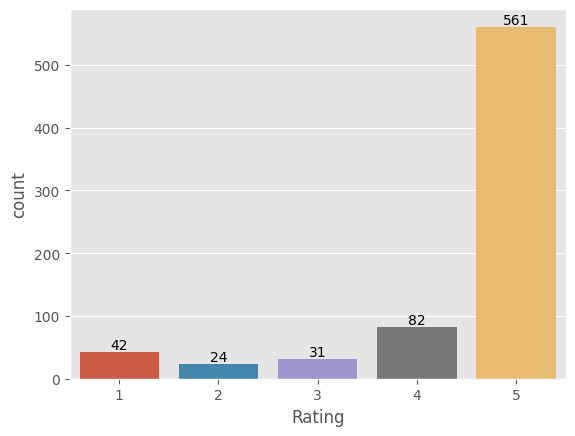

In [303]:
# create plot with number of occurencies for each rating with plt.annotate
sns.countplot(x = df['Rating'])
for i, count in enumerate(df['Rating'].value_counts().sort_index()):
    plt.annotate(count, (i, count), ha='center', va='bottom')
plt.show()

Very biased towards positive reviews; good to know.

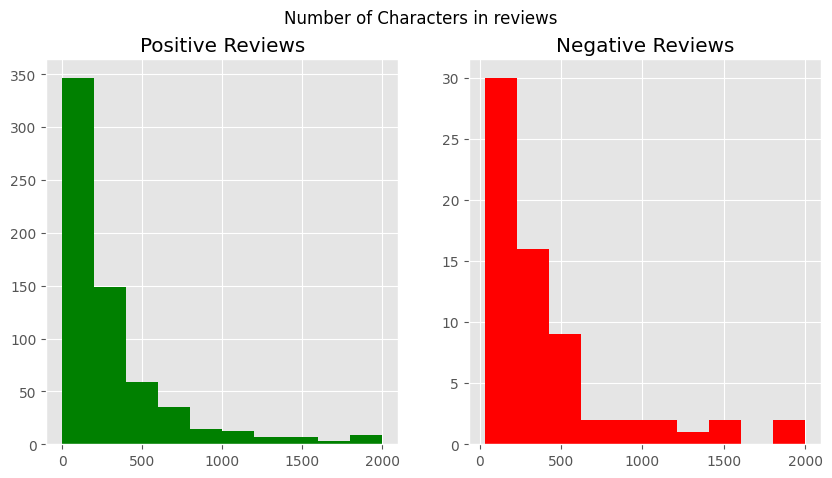

In [304]:
# Number of characters in positive and negative reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(10,5))

len_pos_review=df[df['Rating']>=4]['Content'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')

len_neg_review=df[df['Rating']<=2]['Content'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Number of Characters in reviews')
plt.show()

Negative reviews are for sure less then the positive ones, as we could expect from looking at the ratings distribution, but from here we note that negative reviews tend to be much shorter then the positive ones.

## NLTK

In [324]:
# nltk.download('vader_lexicon')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download("stopwords")
# nltk.download('tagsets')
# nltk.download('wordnet')

In [337]:
example = df['Content'][11]
print(example)

bought a pair of these for my daughter, so good I kept them and ordered another pair :-)


In [338]:
tokens = nltk.word_tokenize(example)
tokens

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'I',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

Tokenized result: basically to convert a sentence into a format which is understable by the computer a.k.a. feature vector. As we can see nltk is smart because it detects the won't word and splits it into 'wo' and "n't".

Now find the part of speech for each of these words:

In [339]:
tag = nltk.pos_tag(tokens)
tag

[('bought', 'VBD'),
 ('a', 'DT'),
 ('pair', 'NN'),
 ('of', 'IN'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('daughter', 'NN'),
 (',', ','),
 ('so', 'RB'),
 ('good', 'JJ'),
 ('I', 'PRP'),
 ('kept', 'VBD'),
 ('them', 'PRP'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('another', 'DT'),
 ('pair', 'NN'),
 (':', ':'),
 ('-', ':'),
 (')', ')')]

What is the meaning of these tags?

In [340]:
# nltk.help.upenn_tagset()

These are the most important:

| Tag  | Meaning       |
|------|---------------|
| JJ   | Adjectives    |
| NN   | Nouns         |
| RB   | Adverbs       |
| PRP  | Pronouns      |
| VB   | Verbs         |

Putting now these tags - part of speech into entities.

In [341]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()       # pretty print nltk function

(S
  bought/VBD
  a/DT
  pair/NN
  of/IN
  these/DT
  for/IN
  my/PRP$
  daughter/NN
  ,/,
  so/RB
  good/JJ
  I/PRP
  kept/VBD
  them/PRP
  and/CC
  ordered/VBD
  another/DT
  pair/NN
  :/:
  -/:
  )/))


**LEMMATIZING:**  A lemma is a word that represents a whole group of words, so lemmatizing consists in reducing  words to their core meaning (doing -> do).

In [342]:
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [350]:
lemmatizer.lemmatize("bought")

'bought'

In [351]:
lemmatized_example = [lemmatizer.lemmatize(token) for token in tokens]
lemmatized_example

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'I',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

In [352]:
tokens

['bought',
 'a',
 'pair',
 'of',
 'these',
 'for',
 'my',
 'daughter',
 ',',
 'so',
 'good',
 'I',
 'kept',
 'them',
 'and',
 'ordered',
 'another',
 'pair',
 ':',
 '-',
 ')']

----

## VADER


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

Compound is an aggregation of the 3, goes from -1 to 1.

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
print(example)
print(sia.polarity_scores(example))

It's been some years since using any monitors as I use DT770 250's for all my audio work and wow, I'm so pleased I added these to my studio...First the sound...The sound is quite flat which is good as you can accurately EQ your sound. The bass is "even", meaning that it's there but it's not exaggerated. The mids are very well balanced (they sound great) and the high end is also fairly well balanced and you can get some nice air and snap when EQing. For those that have the Bayer Dynamic DT770 250's, you'll find your headphones have more "air" and snap a bit more in the highs by default, the lower mids probably have a little more punch, but not much. Going back and forth between the 770's and the monitors should be a similar(ish) experience...Build quality and size..Very petit in size, they don't take up much room. The build is absolutely fine for the price. No issues there...You have standard connections by means of speaker wire and phono to 3.5mm (unbalanced). I'd recommend using some 

In [ ]:
# run on entire dataset
results = {}
for row in df:
    # text = row['Content']
    # Id = row
    # results['Id'] = sia.polarity_scores(text)
    print(row)

Date
Title
Rating
Content


In [ ]:
# run on entire dataset
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Content']
    Id = i
    results[Id] = sia.polarity_scores(text)

  0%|          | 0/740 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

Is this in line with what we expect? If the rating is 5-4, is the rating positive?

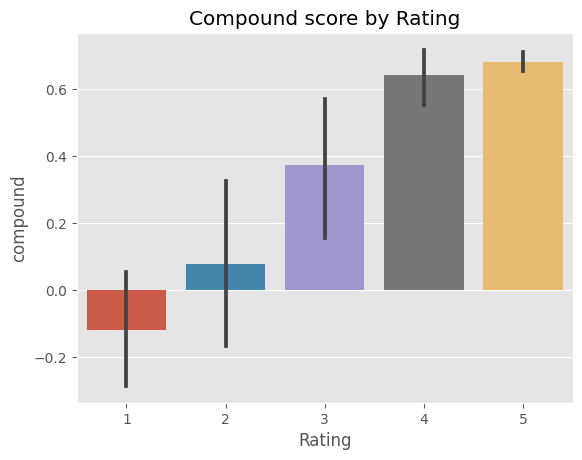

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound score by Rating')
plt.show()

It is what we would expect!

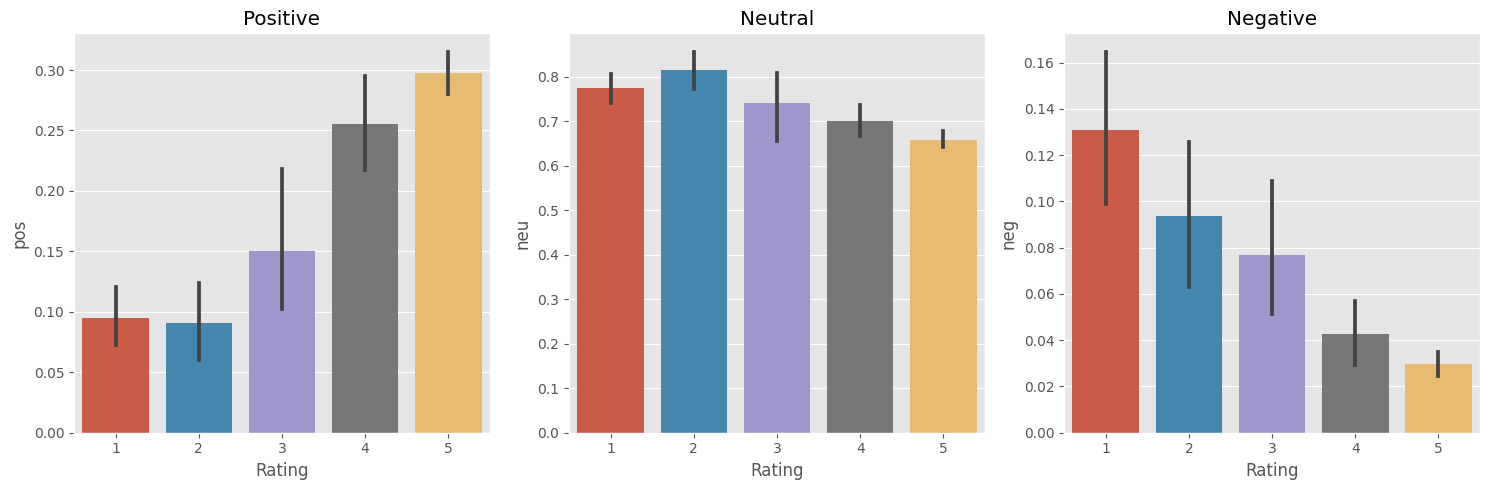

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = vaders, x='Rating', y='pos', ax = axs[0])
sns.barplot(data = vaders, x='Rating', y='neu', ax = axs[1])
sns.barplot(data = vaders, x='Rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

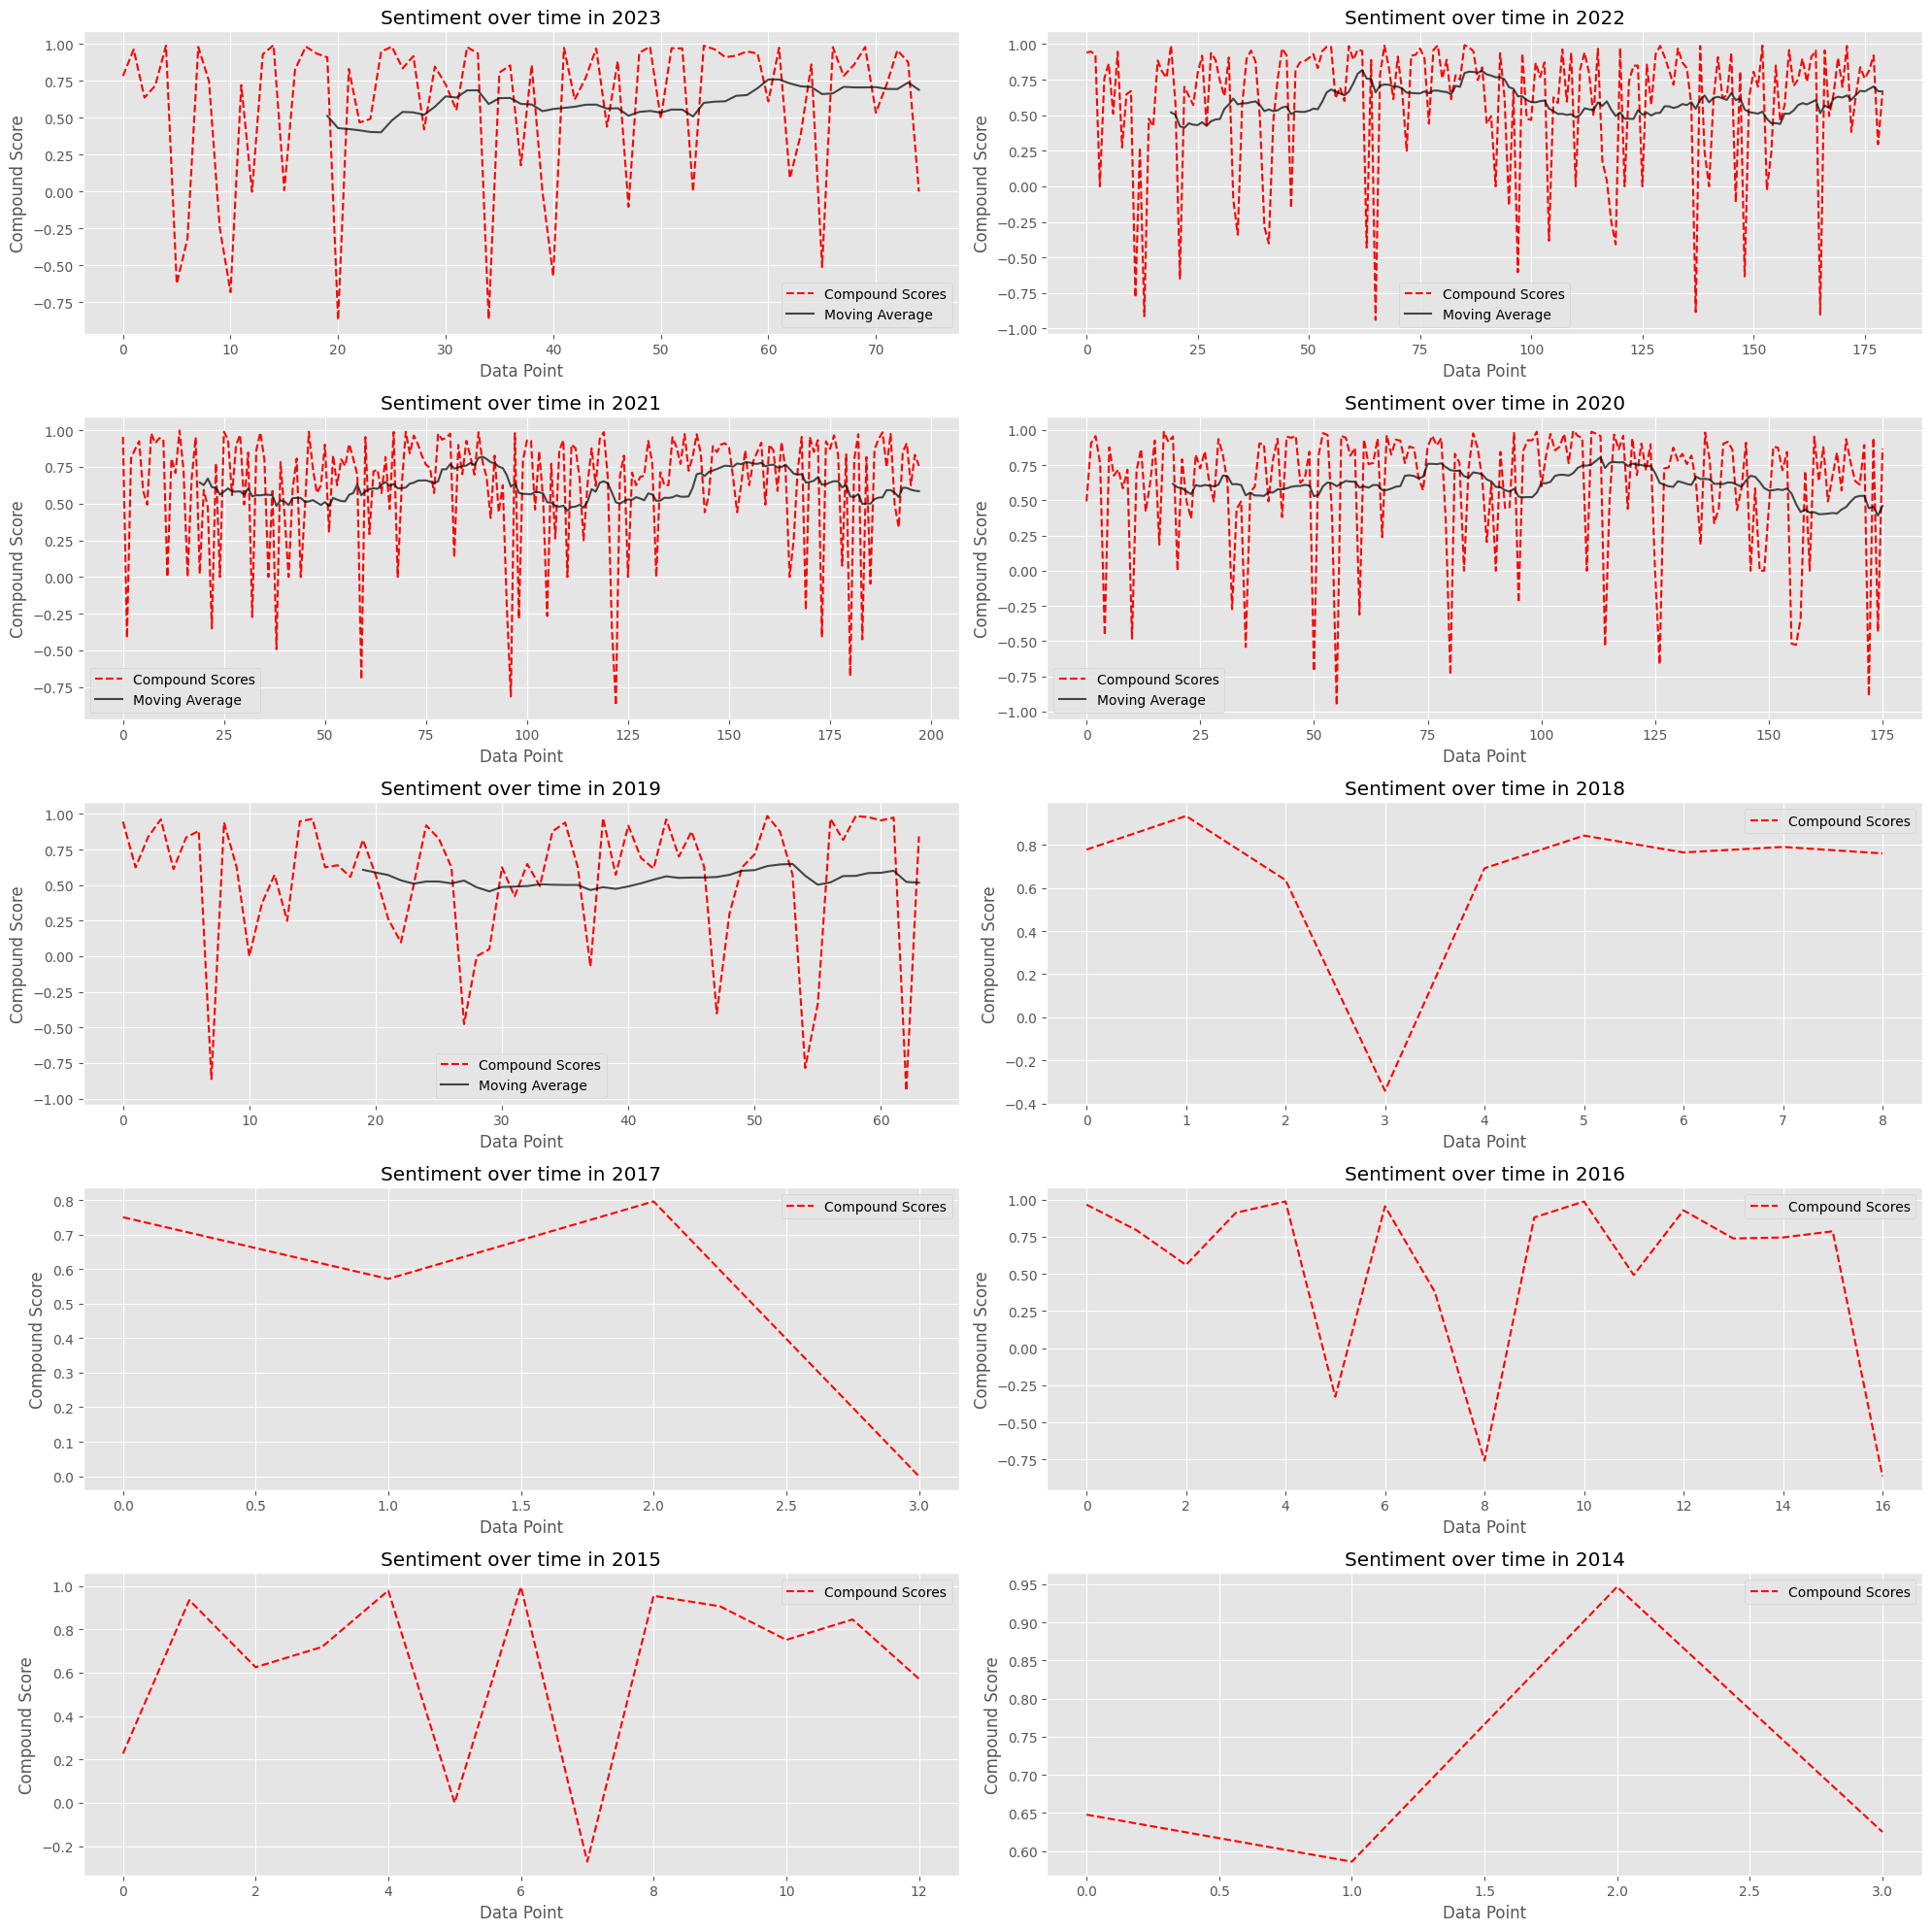

In [ ]:
# not right since do not have days
# barplots of each year are better

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
ax = ax.flatten()

for i, year in enumerate(vaders['Date'].dt.year.unique()):  # Use 'dt.year' to extract the year from the 'Date' column
    # Filter data for the year
    year_data = vaders[vaders['Date'].dt.year == year]['compound'].tolist()
    # Calculate moving average
    if len(year_data) > 60:         # 60 chosen by inspecting how many observations i had for each year
        moving_avg = pd.Series(year_data).rolling(window=20).mean()

        ax[i].plot(year_data, color="red", linestyle='dashed', label='Compound Scores')
        ax[i].plot(moving_avg, color='black', alpha=0.7, label='Moving Average')
        ax[i].set_title(f'Sentiment over time in {year}')
        ax[i].set_xlabel('Data Point')
        ax[i].set_ylabel('Compound Score')
        ax[i].legend()
    
    else:
        ax[i].plot(year_data, color="red", linestyle='dashed', label='Compound Scores')
        ax[i].set_title(f'Sentiment over time in {year}')
        ax[i].set_xlabel('Data Point')
        ax[i].set_ylabel('Compound Score')
        ax[i].legend()

plt.tight_layout()
plt.show()


## RoBERTa

### The Transformers Pipeline

In [ ]:
# from transformers import pipeline

# sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline = ('phrase')